In [1]:
# For numerical computing and data manipulation
import numpy as np
import pandas as pd

In [2]:
# pwd

# Data onboarding and cleaning

### Reading the data

In [3]:
df = pd.read_csv('https://covid.ourworldindata.org/data/owid-covid-data.csv', index_col='location')
# df = pd.read_csv('..\Data\owid-covid-data.csv',index_col='location')

In [4]:
df.to_csv('all_data_backup.csv') # Save data file for reference

### Removing unwanted countries

In [5]:
countries = []
for country in df.index:
    if (country != 'International') & (country != 'World'):
        if country not in countries:
            countries.append(country)

len(countries) # number of countries for which data is available

213

In [6]:
df = df.loc[countries, :]

# df

In [7]:
first_date = '2020-01-24' # date there were at least 100 confirmed cases in China

date_range = df['date'] >= first_date

In [8]:
df = df.loc[date_range]

# df

# Data Visualizer for Countries Most Affected today

### Sorting by Highest New Cases and Highest New Deaths

In [9]:
df_today = (df['date'] == max(df.date))
df_today = df.loc[df_today]

df_today.index # List of countries with cases today

Index(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Anguilla',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       ...
       'Uruguay', 'Uzbekistan', 'Vatican', 'Venezuela', 'Vietnam',
       'Wallis and Futuna', 'Western Sahara', 'Yemen', 'Zambia', 'Zimbabwe'],
      dtype='object', name='location', length=209)

In [10]:
list(set(countries) - set(df_today.index)) # list of countries who have not reported case numbers for today and are excluded from this vizualization

['Sweden', 'Belgium', 'Spain', 'Hong Kong']

In [11]:
df_today = df_today.sort_values(by='new_cases', ascending=False)
df_new_cases = df_today.head(8)

df_new_cases.index # List of countries with highest new cases

Index(['United States', 'India', 'France', 'Brazil', 'Italy', 'United Kingdom',
       'Poland', 'Netherlands'],
      dtype='object', name='location')

In [12]:
df_new_deaths = df_today.sort_values(by='new_deaths', ascending=False)
df_new_deaths = df_new_deaths.head(8)

df_new_deaths.index # List of countries with highest new deaths

Index(['United States', 'India', 'Brazil', 'Mexico', 'Iran', 'Russia',
       'Argentina', 'United Kingdom'],
      dtype='object', name='location')

### Saving data only for today's most affected countries (unique highest new cases and highest new deaths)

In [13]:
countries = []
for country in df_today.index:
    if (country in df_new_deaths.index) | (country in df_new_cases.index):
    # if (country.isin(df_new_deaths.index)) | (country.isin(df_new_cases.index)):
        countries.append(country)

len(countries) # number of countries that are most affected today (highest new cases or highest new deaths)

12

In [14]:
plot_data = df.loc[countries, ['date','total_cases','new_cases','total_deaths','new_deaths']]

# plot_data

In [15]:
# Save data file
plot_data.to_csv('../Tableau/tableau_data.csv')

### Removing unwanted dates

In [16]:
import datetime as dt
now = dt.date.today()
end_date = now.strftime("%Y-%m-%d")

start_date = now - dt.timedelta(days=30)
start_date = start_date.strftime("%Y-%m-%d")
# start_date = '2020-01-20' # date of first confirmed case in US

date_range = (plot_data['date'] >= start_date)

In [17]:
plot_data = plot_data.loc[date_range]

# plot_data

### Formatting data

In [18]:
plot_date=[]
for dates in plot_data['date']:
    if dates not in plot_date:
        plot_date.append(dates)

# plot_date

In [19]:
plot_data.index.value_counts() # number of data points to be plotted

France            31
Brazil            31
Russia            31
India             31
Poland            31
United States     31
United Kingdom    31
Italy             31
Mexico            31
Netherlands       31
Argentina         31
Iran              31
Name: location, dtype: int64

In [20]:
dic_new_cases={}
for i in range(len(countries)):
    dic_new_cases[i] = plot_data.loc[countries[i], ['date','new_cases']]

# dic_new_cases

In [21]:
dic_new_deaths={}
for i in range(len(countries)):
    dic_new_deaths[i] = plot_data.loc[countries[i], ['date','new_deaths']]
    
# dic_new_deaths

In [22]:
from datetime import datetime

date_string = str(max(plot_date))
date_object = datetime.strptime(date_string, '%Y-%m-%d')
date_format = date_object.strftime("%b %d %Y")

chart_title = 'Most Affected Countries on ' + date_format

### Plot (finally!)

In [23]:
import matplotlib.pyplot as plt

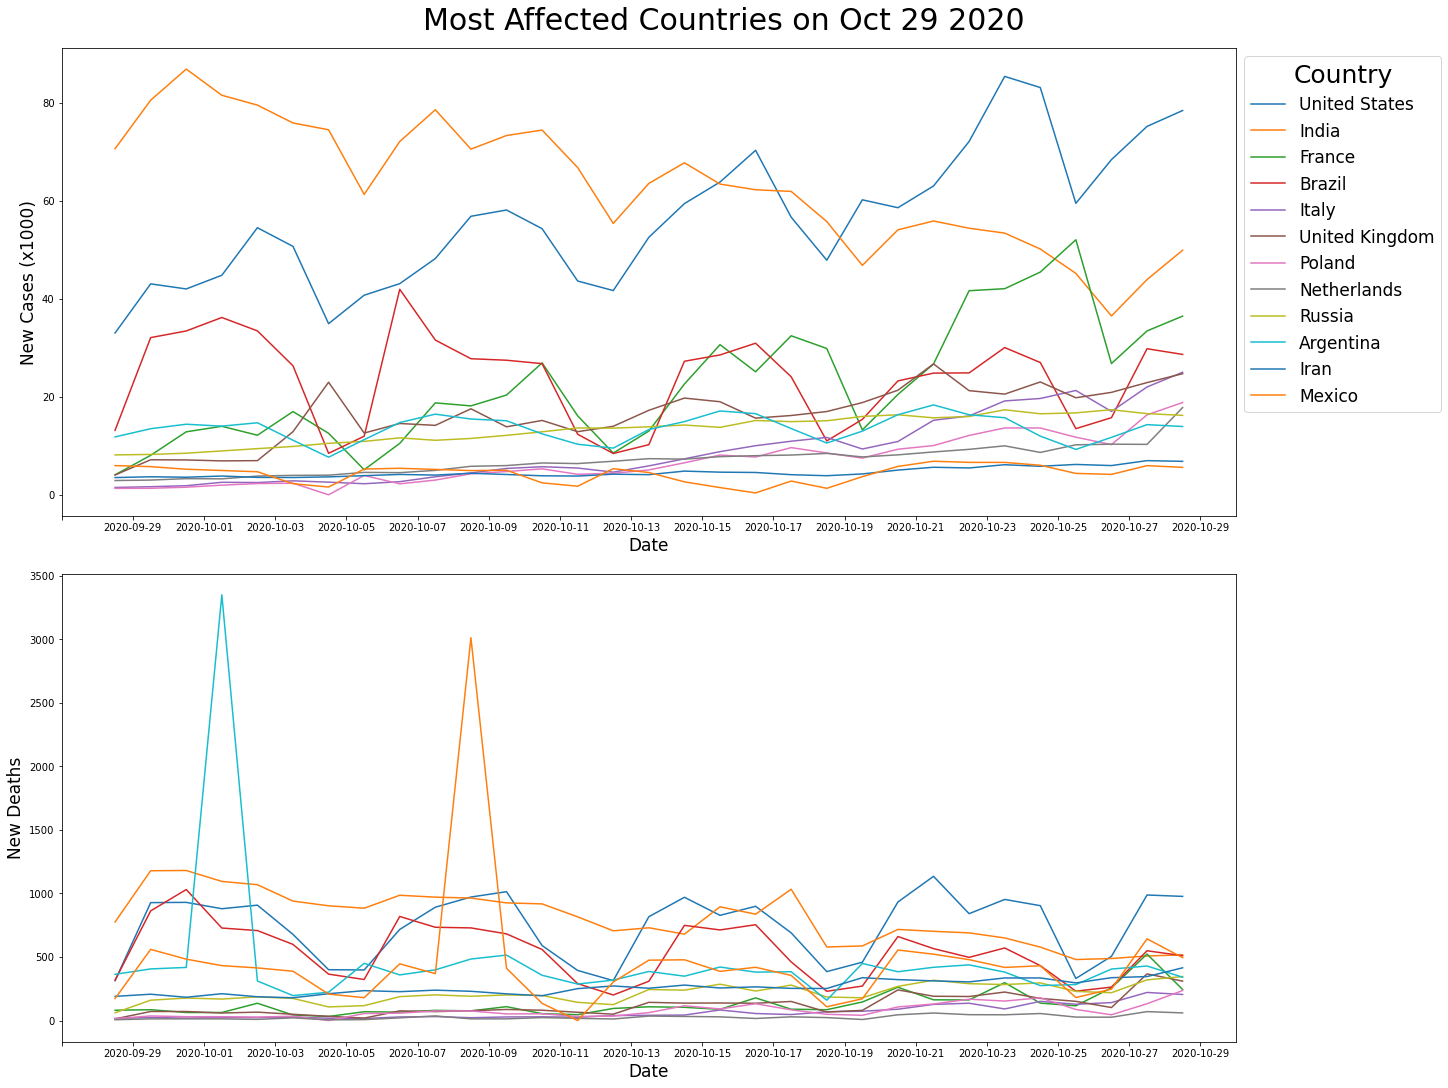

In [24]:
f, (ax1, ax2) = plt.subplots(2,1, figsize=(20,15), constrained_layout=True)
f.suptitle(chart_title, fontsize=30)

for x in range(len(countries)):
    ax1.plot(plot_date, dic_new_cases[x]['new_cases']/1000, label=countries[x])
# ax1.plot(plot_date, df_india_new_cases/1000, label='India')
# ax1.plot(plot_date, df_us_new_cases/1000, label='US')
ax1.set_xlabel('Date', fontsize=17)
ax1.set_ylabel('New Cases (x1000)', fontsize=17)
# ax1.set_title('New Cases over time', fontsize=20)
ax1.legend(bbox_to_anchor=(1, 1), fontsize=17, title="Country", title_fontsize=25)

for x in range(len(countries)):
    ax2.plot(plot_date, dic_new_deaths[x]['new_deaths'], label=countries[x])
# ax2.plot(plot_date, df_india_new_deaths, label='India')
# ax2.plot(plot_date, df_us_new_deaths, label='US')
ax2.set_xlabel('Date', fontsize=17)
ax2.set_ylabel('New Deaths', fontsize=17)
# ax2.set_title('New Deaths over time', fontsize=20)

start, end = ax1.get_xlim()
ax1.xaxis.set_ticks(np.arange(start, end, 2))
ax2.xaxis.set_ticks(np.arange(start, end, 2))

# plt.subplots_adjust(hspace=0.4)
plt.show()

In [25]:
f.savefig('covid_plot.png', dpi=300)

# Data Visualizer for G20 Countries

In [26]:
G20 = ['Argentina', 'Australia', 'Brazil', 'Canada', 'China', 'France', 'Germany', 'India', 'Indonesia', 'Italy', 'Japan', 'Mexico', 'Russia', 'Saudi Arabia', 'South Africa', 'South Korea', 'Turkey', 'United Kingdom', 'United States', 'Spain']
# G8plus5 = ['Canada', 'France', 'Germany', 'Italy', 'Japan', 'United Kingdom', 'United States', 'Russia', 'Brazil', 'China', 'India', 'Mexico', 'South Africa']

In [27]:
df_g20 = df.loc[G20, ['date','total_cases','total_deaths']]

len(set(df_g20.index)) # number of G20 countries found in data

# df_g20

20

In [28]:
# df_us = plot_data.loc['United States', :]

# df_us_new_cases = df_us['new_cases']
# df_us_new_deaths = df_us['new_deaths']

In [29]:
# Save data file
df_g20.to_csv('../Tableau/g20_data.csv')

# Data Visualizer for US States

In [30]:
df_us = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv', index_col='state')

In [31]:
calc_date = df_us.date.unique()[-2]
calc_date_range = (df_us['date'] >= calc_date)

df_us = df_us.loc[calc_date_range]

In [32]:
df_us = df_us.sort_values(by=['state','date'])

df_us['new_cases'] = 0
df_us = df_us[df_us.columns[~df_us.columns.isin(['fips'])]]

In [33]:
for d in range(1,len(df_us.index),1):
    if (d % 2) != 0:
        df_us.iat[d,3] = max(0, df_us.iat[d,1] - df_us.iat[d-1,1])
# df_us

In [34]:
us_max_date = (df_us['date'] == max(df_us.date))

df_us = df_us.loc[us_max_date]

# df_us

In [35]:
# Save data file
df_us.to_csv('../Tableau/US/us-states.csv')

In [36]:
print('See visualization at: \n https://public.tableau.com/profile/nihar.garg#!/vizhome/COVID19_visualizer_US/USStateswithHighestTotalCases \nAND \n https://public.tableau.com/profile/nihar.garg#!/vizhome/COVID19_visualizer_US/USStatesandTerritories')

See visualization at: 
 https://public.tableau.com/profile/nihar.garg#!/vizhome/COVID19_visualizer_US/USStateswithHighestTotalCases 
AND 
 https://public.tableau.com/profile/nihar.garg#!/vizhome/COVID19_visualizer_US/USStatesandTerritories
